# Field

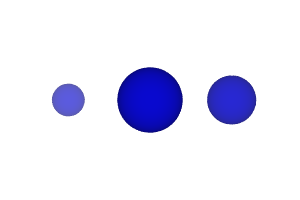

In [1]:
import numpy as np

from fdray import *


def get_object(x):
    return Sphere(0, x, Color("blue", alpha=2 * x))


Scene(
    Camera(-90, 0, view_scale=1.5),
    LightSource(0, "white"),
    Union.from_field([0.2, 0.4, 0.3], get_object, ndim=0),
).render(300, 200)

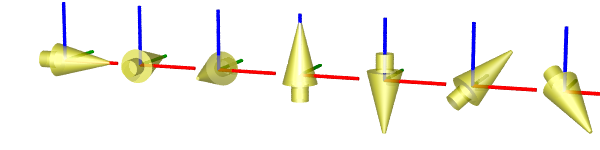

In [2]:
axes = Union(
    Cylinder(0, "0.7*x", 0.02, Color("red")),
    Cylinder(0, "0.7*y", 0.02, Color("green")),
    Cylinder(0, "0.7*z", 0.02, Color("blue")),
)

arrow = Merge(
    Cone((-0.1, 0, 0), 0.2, (0.6, 0, 0), 0.02),
    Cylinder((-0.3, 0, 0), (0, 0, 0), 0.1),
    Color("yellow", transmit=0.5),
    Finish(specular=0.3, brilliance=3),
)


direction = [
    [1, 0, 0],
    [0, 1, 0],
    [0, -1, 0],
    [0, 0, 1],
    [0, 0, -1],
    [1, 1, 1],
    [1, -1, -1],
]

Scene(
    Camera(-70, 10, view_scale=1.7),
    LightSource((0.4, 30, 40), "white"),
    LightSource(0, "white"),
    Union.from_field(direction, lambda x: (arrow.align(x), axes)),
).render(600, 150)

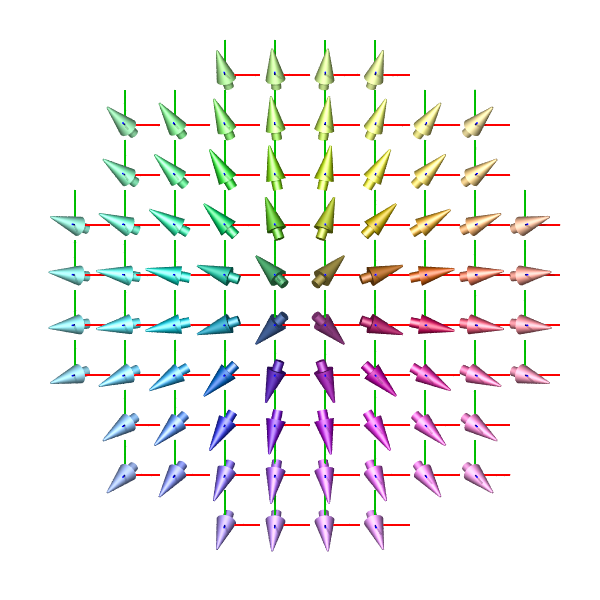

In [3]:
x, y = np.meshgrid(np.arange(-4.5, 5), np.arange(-5.5, 6))
n = np.sqrt(x**2 + y**2)
mask = n < 5
field = np.stack([y / n, x / n, 0.3 * (n - np.sqrt(5))], axis=-1)
norms = np.linalg.norm(field, axis=-1)
field = field / norms[..., None]


def get_arrow(x):
    return Merge(
        Cone((-0.1, 0, 0), 0.2, (0.6, 0, 0), 0.02),
        Cylinder((-0.3, 0, 0), (0, 0, 0), 0.1),
        Color.from_direction(x),
        Finish(specular=0.3, brilliance=3),
    ).align(x)


Scene(
    Camera(-90, 90, view_scale=6),
    LightSource((0.4, 30, 40), "white"),
    LightSource(0, "white"),
    Union.from_field(field, lambda x: (get_arrow(x), axes), mask=mask),
).render(600, 600)